<a href="https://colab.research.google.com/github/abhishekgodaba/EA-and-HAM-Hackathon/blob/master/SignLanguageDigits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Download the dataset given in the readme and upload it in this path /content/drive/My Drive

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Unzipping and extracting the dataset

In [ ]:
from zipfile import ZipFile 
file_name = "/content/drive/My Drive/Sign_Language_digits.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()

Importing necessary libraries

In [ ]:
import os, cv2, math
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import plot_model
import numpy as np
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from shutil import copyfile
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

Using TensorFlow backend.


Storing the filepath 

In [ ]:
dataDir = "/content/Sign_Language_digits"
zero= dataDir+"/0"
one= dataDir+"/1"
two= dataDir+"/2"
three= dataDir+"/3"
four= dataDir+"/4"
five= dataDir+"/5"
six= dataDir+"/6"
seven= dataDir+"/7"
eight= dataDir+"/8"
nine= dataDir+"/9"


Image preprocessing and reading the images and labels

In [ ]:
images = []
labels = []

def load_images(folder):
   # image preprocessing 
   for filename in os.listdir(folder):
     img = cv2.imread(os.path.join(folder,filename))
     img = cv2.cvtColor(img, 0) # Converts into the corret colorspace (GRAY)
     img = cv2.resize(img, (64,64))
     
     #reading the images and labels
     if img is not None:
       images.append(img)
       labels.append(zero[-1])
   return images,labels
imgs,label=load_images(zero)

The same thing is done in the next 9 cells

In [ ]:
def load_images(folder):
   for filename in os.listdir(folder):
     img = cv2.imread(os.path.join(folder,filename))
     img = cv2.cvtColor(img, 0) # Converts into the corret colorspace (GRAY)
     img = cv2.resize(img, (64,64))
     if img is not None:
       images.append(img)
       labels.append(one[-1])
   return images,labels
imgs,label=load_images(one)

In [ ]:
def load_images(folder):
   for filename in os.listdir(folder):
     img = cv2.imread(os.path.join(folder,filename))
     img = cv2.cvtColor(img, 0) # Converts into the corret colorspace (GRAY)
     img = cv2.resize(img, (64,64))
     if img is not None:
       images.append(img)
       labels.append(two[-1])
   return images,labels
imgs,label=load_images(two)

In [ ]:
def load_images(folder):
   for filename in os.listdir(folder):
     img = cv2.imread(os.path.join(folder,filename))
     img = cv2.cvtColor(img, 0) # Converts into the corret colorspace (GRAY)
     img = cv2.resize(img, (64,64))
     if img is not None:
       images.append(img)
       labels.append(three[-1])
   return images,labels
imgs,label=load_images(three)

In [ ]:
def load_images(folder):
   for filename in os.listdir(folder):
     img = cv2.imread(os.path.join(folder,filename))
     img = cv2.cvtColor(img, 0) # Converts into the corret colorspace (GRAY)
     img = cv2.resize(img, (64,64))
     if img is not None:
       images.append(img)
       labels.append(four[-1])
   return images,labels
imgs,label=load_images(four)

In [ ]:
def load_images(folder):
   for filename in os.listdir(folder):
     img = cv2.imread(os.path.join(folder,filename))
     img = cv2.cvtColor(img, 0) # Converts into the corret colorspace (GRAY)
     img = cv2.resize(img, (64,64))
     if img is not None:
       images.append(img)
       labels.append(five[-1])
   return images,labels
imgs,label=load_images(five)

In [ ]:
def load_images(folder):
   for filename in os.listdir(folder):
     img = cv2.imread(os.path.join(folder,filename))
     img = cv2.cvtColor(img, 0) # Converts into the corret colorspace (GRAY)
     img = cv2.resize(img, (64,64))
     if img is not None:
       images.append(img)
       labels.append(six[-1])
   return images,labels
imgs,label=load_images(six)

In [ ]:
def load_images(folder):
   for filename in os.listdir(folder):
     img = cv2.imread(os.path.join(folder,filename))
     img = cv2.cvtColor(img, 0) # Converts into the corret colorspace (GRAY)
     img = cv2.resize(img, (64,64))
     if img is not None:
       images.append(img)
       labels.append(seven[-1])
   return images,labels
imgs,label=load_images(seven)

In [ ]:
def load_images(folder):
   for filename in os.listdir(folder):
     img = cv2.imread(os.path.join(folder,filename))
     img = cv2.cvtColor(img, 0) # Converts into the corret colorspace (GRAY)
     img = cv2.resize(img, (64,64))
     if img is not None:
       images.append(img)
       labels.append(eight[-1])
   return images,labels
imgs,label=load_images(eight)

In [ ]:
def load_images(folder):
   for filename in os.listdir(folder):
     img = cv2.imread(os.path.join(folder,filename))
     img = cv2.cvtColor(img, 0) # Converts into the corret colorspace (GRAY)
     img = cv2.resize(img, (64,64))
     if img is not None:
       images.append(img)
       labels.append(nine[-1])
   return images,labels
imgs,label=load_images(nine)

Finding out the number of images and labels read

In [ ]:
print(len(imgs),len(label))

2062 2062


Image scaling and reshaping 

In [ ]:
imgs = np.asarray(imgs)
imgs=imgs/255 #scaling the images
imgs = imgs.reshape(len(label),64,64,4)
label = np.asarray(label)
print(len(imgs),len(label))

2062 2062


Seperating the training and testing datasets 

In [ ]:
ts = 0.3 # Percentage of images that we want to use for testing. The rest is used for training.
X_train, X_test, y_train, y_test = train_test_split(imgs, label, test_size=ts, random_state=42)

Constructing the model

In [ ]:
# Construction of model
model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(64, 64, 4))) 
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.30525))
model.add(Conv2D(32, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.30525))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.30525))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

Configuring the model for training

In [ ]:
# Configures the model for training
model.compile(optimizer='adam', # Optimization routine, which tells the computer how to adjust the parameter values to minimize the loss function.
              loss='sparse_categorical_crossentropy', # Loss function, which tells us how bad our predictions are.
              metrics=['accuracy']) # List of metrics to be evaluated by the model during training and testing.

Training the model

In [ ]:
# Trains the model for a given number of epochs (iterations on a dataset) and validates it.
history = model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=2, validation_data=(X_test, y_test))

Train on 1443 samples, validate on 619 samples
Epoch 1/100
 - 3s - loss: 2.3321 - accuracy: 0.0984 - val_loss: 2.3004 - val_accuracy: 0.0969
Epoch 2/100
 - 0s - loss: 2.2784 - accuracy: 0.1414 - val_loss: 2.2325 - val_accuracy: 0.2714
Epoch 3/100
 - 0s - loss: 1.8452 - accuracy: 0.3638 - val_loss: 1.3694 - val_accuracy: 0.5347
Epoch 4/100
 - 0s - loss: 1.1594 - accuracy: 0.6022 - val_loss: 0.8908 - val_accuracy: 0.7270
Epoch 5/100
 - 0s - loss: 0.8896 - accuracy: 0.6985 - val_loss: 0.6969 - val_accuracy: 0.7803
Epoch 6/100
 - 0s - loss: 0.7383 - accuracy: 0.7581 - val_loss: 0.6262 - val_accuracy: 0.7948
Epoch 7/100
 - 0s - loss: 0.6499 - accuracy: 0.7782 - val_loss: 0.5806 - val_accuracy: 0.8191
Epoch 8/100
 - 0s - loss: 0.5591 - accuracy: 0.8136 - val_loss: 0.5876 - val_accuracy: 0.8271
Epoch 9/100
 - 0s - loss: 0.4931 - accuracy: 0.8365 - val_loss: 0.4787 - val_accuracy: 0.8578
Epoch 10/100
 - 0s - loss: 0.4295 - accuracy: 0.8676 - val_loss: 0.4513 - val_accuracy: 0.8627
Epoch 11/100

Plotting the training and testing accuracies agains the number of epochs

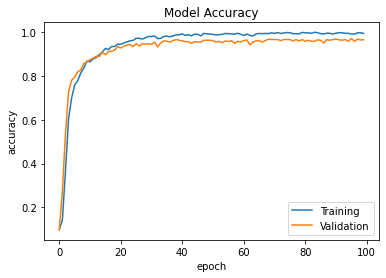

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training', 'Validation'])

Testing the model and printing its accuracy

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test accuracy: {:2.2f}%'.format(test_acc*100))

619/619 [==============================] - 0s 263us/step
Test accuracy: 96.45%


Making the predictions!

In [ ]:
predictions = model.predict(X_test) # Make predictions towards the test set

In [ ]:
np.argmax(predictions[0]), y_test[0] # If same, got it right

(6, '6')

The final prediction result of the model

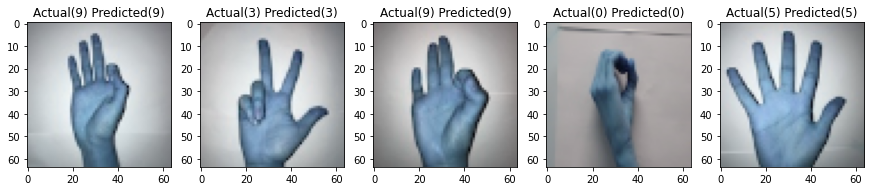

In [ ]:
fig=plt.figure(figsize=(15, 15))
columns = 5
for i in range(1, columns+1):
    img = X_test[i]
    fig.add_subplot(1,columns, i)
    plt.imshow(img)
    plt.title("Actual({}) Predicted({})".format(y_test[i],np.argmax(predictions[i])))
plt.show()